In [1]:
import torch
import numpy as np
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
class TwoLayersPerceptron(torch.nn.Module):
    def __init__(self, number_of_inputs=2, hidden_layer_size=3, number_of_outputs=2,
                 dropout_ratio=0.5):
        super(TwoLayersPerceptron, self).__init__()
        self.number_of_inputs = number_of_inputs
        self.hidden_layer_size = hidden_layer_size
        self.number_of_outputs = number_of_outputs
        self.dropout_ratio = dropout_ratio

        self.linear1 = torch.nn.Linear(self.number_of_inputs, self.hidden_layer_size)
        self.linear2 = torch.nn.Linear(self.hidden_layer_size, self.number_of_outputs)
        self.dropout = torch.nn.Dropout(p=self.dropout_ratio)

    def forward(self, input_tsr):  # input_tsr.shape = (N, N_in):
        act1 = self.linear1(input_tsr)  # (N, H)
        act2 = torch.nn.functional.relu(act1)  # (N, H)
        act3 = self.dropout(act2)  # (N, H)
        act4 = self.linear2(act3)  # (N, N_out)
        return act4

In [3]:
class FourLayersPerceptron(torch.nn.Module):
    def __init__(self, number_of_inputs=2, hidden_layer1_size=100, hidden_layer2_size=100, 
                 hidden_layer3_size=100, number_of_outputs=2,
                 dropout_ratio=0.5):
        super(FourLayersPerceptron, self).__init__()
        self.number_of_inputs = number_of_inputs
        self.hidden_layer1_size = hidden_layer1_size
        self.hidden_layer2_size = hidden_layer2_size
        self.hidden_layer3_size = hidden_layer3_size
        self.number_of_outputs = number_of_outputs
        self.dropout_ratio = dropout_ratio

        self.linear1 = torch.nn.Linear(self.number_of_inputs, self.hidden_layer1_size)
        self.linear2 = torch.nn.Linear(self.hidden_layer1_size, self.hidden_layer2_size)
        self.linear3 = torch.nn.Linear(self.hidden_layer2_size, self.hidden_layer3_size)
        self.linear4 = torch.nn.Linear(self.hidden_layer3_size, self.number_of_outputs)
        self.dropout = torch.nn.Dropout(p=self.dropout_ratio)

    def forward(self, input_tsr):  # input_tsr.shape = (N, N_in):
        act1 = self.linear1(input_tsr)  # (N, H1)
        act2 = torch.nn.functional.relu(act1)  # (N, H1)
        act3 = self.dropout(act2)  # (N, H1)
        act4 = self.linear2(act3)  # (N, H2)
        act5 = torch.nn.functional.relu(act4)  # (N, H2)
        act6 = self.dropout(act5)  # (N, H2)
        act7 = self.linear3(act6)  # (N, H3)
        act8 = torch.nn.functional.relu(act7)  # (N, H3)
        act9 = self.dropout(act8)  # (N, H3)
        act10 = self.linear4(act9)  # (N, N_out)
        return act10

In [4]:
class SixLayersPerceptron(torch.nn.Module):
    def __init__(self, number_of_inputs=2, hidden_layer1_size=100, hidden_layer2_size=100, 
                 hidden_layer3_size=100, hidden_layer4_size=100, hidden_layer5_size=100, number_of_outputs=2,
                 dropout_ratio=0.5):
        super(SixLayersPerceptron, self).__init__()
        self.number_of_inputs = number_of_inputs
        self.hidden_layer1_size = hidden_layer1_size
        self.hidden_layer2_size = hidden_layer2_size
        self.hidden_layer3_size = hidden_layer3_size
        self.hidden_layer4_size = hidden_layer4_size
        self.hidden_layer5_size = hidden_layer5_size
        self.number_of_outputs = number_of_outputs
        self.dropout_ratio = dropout_ratio

        self.linear1 = torch.nn.Linear(self.number_of_inputs, self.hidden_layer1_size)
        self.linear2 = torch.nn.Linear(self.hidden_layer1_size, self.hidden_layer2_size)
        self.linear3 = torch.nn.Linear(self.hidden_layer2_size, self.hidden_layer3_size)
        self.linear4 = torch.nn.Linear(self.hidden_layer3_size, self.hidden_layer4_size)
        self.linear5 = torch.nn.Linear(self.hidden_layer4_size, self.hidden_layer5_size)
        self.linear6 = torch.nn.Linear(self.hidden_layer5_size, self.number_of_outputs)
        self.dropout = torch.nn.Dropout(p=self.dropout_ratio)

    def forward(self, input_tsr):  # input_tsr.shape = (N, N_in):
        act1 = self.linear1(input_tsr)  # (N, H1)
        act2 = torch.nn.functional.relu(act1)  # (N, H1)
        act3 = self.dropout(act2)  # (N, H1)
        act4 = self.linear2(act3)  # (N, H2)
        act5 = torch.nn.functional.relu(act4)  # (N, H2)
        act6 = self.dropout(act5)  # (N, H2)
        act7 = self.linear3(act6)  # (N, H3)
        act8 = torch.nn.functional.relu(act7)  # (N, H3)
        act9 = self.dropout(act8)  # (N, H3)
        act10 = self.linear4(act9)  # (N, H4)
        act11 = torch.nn.functional.relu(act10)  # (N, H4)
        act12 = self.dropout(act11)  # (N, H4)
        act13 = self.linear5(act12)  # (N, H5)
        act14 = torch.nn.functional.relu(act13)  # (N, H5)
        act15 = self.dropout(act14)  # (N, H5)
        act16 = self.linear6(act15)  # (N, N_out)
        return act16

In [5]:
class FeaturesAndClass(Dataset):
    def __init__(self, dataset_filepath):
        super(FeaturesAndClass, self).__init__()
        self.dataset_df = pd.read_csv(dataset_filepath)

    def __len__(self):
        return len(self.dataset_df)

    def __getitem__(self, idx):
        observation = self.dataset_df.iloc[idx]  # Retrieve the observation
        features = list(observation[0: -1])  # List of features
        input_tsr = torch.tensor(features)  # Tensor of features
        class_tensor = torch.tensor(int(observation['class']))  # A tensor containing either 0 or 1
        return input_tsr, class_tensor  # Returns the input tensor and the target class index, as a tuple


In [6]:
# Load the dataset
batch_size = 16
dataset_filepath = "./output_generate_ND_points/sixfeatures_threeclasses.csv"
# dataset_filepath = "/usercode/images/datasets/sixfeatures_threeclasses.csv"
dataset = FeaturesAndClass(dataset_filepath)
# Split the dataset into a training and a validation datasets
number_of_validation_observations = round(0.2 * len(dataset))
train_dataset, validation_dataset = torch.utils.data.random_split(dataset, [len(dataset) - number_of_validation_observations, number_of_validation_observations])
# Create data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# Create the neural network
"""hidden_layer_size = 100
dropout_ratio = 0.5
neural_net = TwoLayersPerceptron(
    number_of_inputs=6,
    hidden_layer_size=hidden_layer_size,
    number_of_outputs=3,
    dropout_ratio=dropout_ratio)
"""

hidden_layer1_size = 100
hidden_layer2_size = 100
hidden_layer3_size = 100
dropout_ratio = 0.25
neural_net = FourLayersPerceptron(
    number_of_inputs=6,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    number_of_outputs=3,
    dropout_ratio=dropout_ratio)

"""
hidden_layer1_size = 100
hidden_layer2_size = 100
hidden_layer3_size = 100
hidden_layer4_size = 100
hidden_layer5_size = 100
dropout_ratio = 0.25
neural_net = SixLayersPerceptron(
    number_of_inputs=6,
    hidden_layer1_size=hidden_layer1_size,
    hidden_layer2_size=hidden_layer2_size,
    hidden_layer3_size=hidden_layer3_size,
    hidden_layer4_size=hidden_layer4_size,
    hidden_layer5_size=hidden_layer5_size,
    number_of_outputs=3,
    dropout_ratio=dropout_ratio)
"""

'\nhidden_layer1_size = 100\nhidden_layer2_size = 100\nhidden_layer3_size = 100\nhidden_layer4_size = 100\nhidden_layer5_size = 100\ndropout_ratio = 0.25\nneural_net = SixLayersPerceptron(\n    number_of_inputs=6,\n    hidden_layer1_size=hidden_layer1_size,\n    hidden_layer2_size=hidden_layer2_size,\n    hidden_layer3_size=hidden_layer3_size,\n    hidden_layer4_size=hidden_layer4_size,\n    hidden_layer5_size=hidden_layer5_size,\n    number_of_outputs=3,\n    dropout_ratio=dropout_ratio)\n'

In [8]:
# Training parameters
learning_rate = 0.003
weight_decay = 0.0000001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neural_net.parameters(), lr=learning_rate, weight_decay=weight_decay)


In [9]:
# Create an output directory
output_directory = "./output_train_neural_network"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [10]:
# Utility function
def numberOfCorrectPredictions(predictions_tsr, target_class_tsr):
    return sum(torch.argmax(predictions_tsr, dim=1) == target_class_tsr).item()

In [11]:
# Training loop
# Record statistics
epochs = []
train_losses = []
validation_losses = []
accuracies = []

number_of_epochs = 50
for epoch in range(1, number_of_epochs + 1):
    # Set the neural network to training mode
    neural_net.train()
    running_loss = 0.0
    number_of_batches = 0
    for input_tsr, target_class_tsr in train_dataloader:
        # Set the parameter gradients to zero before every batch
        neural_net.zero_grad()
        # Pass the input tensor through the neural network
        output_tsr = neural_net(input_tsr)
        # Compute the loss, i.e., the error function we want to minimize
        loss = criterion(output_tsr, target_class_tsr)
        # Retropropagate the loss function, to compute the gradient of the loss function with
        # respect to every trainable parameter in the neural network
        loss.backward()
        # Perturb every trainable parameter by a small quantity, in the direction of the steepest loss descent
        optimizer.step()

        running_loss += loss.item()
        number_of_batches += 1
    average_training_loss = running_loss/number_of_batches
    
    # Evaluate with the validation dataset
    # Set the neural network to evaluation (inference) mode
    neural_net.eval()
    validation_running_loss = 0.0
    number_of_batches = 0
    number_of_correct_predictions = 0
    number_of_predictions = 0
    for validation_input_tsr, validation_target_output_tsr in validation_dataloader:
        # Pass the input tensor through the neural network
        validation_output_tsr = neural_net(validation_input_tsr)
        # Compute the validation loss
        validation_loss = criterion(validation_output_tsr, validation_target_output_tsr)
        validation_running_loss += validation_loss.item()
        number_of_correct_predictions += numberOfCorrectPredictions(validation_output_tsr, validation_target_output_tsr)
        number_of_predictions += validation_input_tsr.shape[0]
        number_of_batches += 1
    average_validation_loss = validation_running_loss/number_of_batches
    accuracy = number_of_correct_predictions/number_of_predictions
    print(f"Epoch {epoch}: average_training_loss = {average_training_loss}; average_validation_loss = {average_validation_loss}; accuracy = {accuracy}")
    epochs.append(epoch)
    train_losses.append(average_training_loss)
    validation_losses.append(average_validation_loss)
    accuracies.append(accuracy)

Epoch 1: average_training_loss = 0.9750451894601186; average_validation_loss = 0.8940844146410624; accuracy = 0.5958333333333333
Epoch 2: average_training_loss = 0.8732223428289095; average_validation_loss = 0.8042307408650716; accuracy = 0.6533333333333333
Epoch 3: average_training_loss = 0.8209289072950681; average_validation_loss = 0.7605819821357727; accuracy = 0.655
Epoch 4: average_training_loss = 0.7792481637001037; average_validation_loss = 0.766636205514272; accuracy = 0.665
Epoch 5: average_training_loss = 0.7570293018221855; average_validation_loss = 0.7082105298837026; accuracy = 0.6958333333333333
Epoch 6: average_training_loss = 0.7264718596140544; average_validation_loss = 0.6965274635950724; accuracy = 0.6941666666666667
Epoch 7: average_training_loss = 0.7098837065696716; average_validation_loss = 0.6315950699647268; accuracy = 0.7316666666666667
Epoch 8: average_training_loss = 0.6852406274278958; average_validation_loss = 0.6390113612016042; accuracy = 0.740833333333

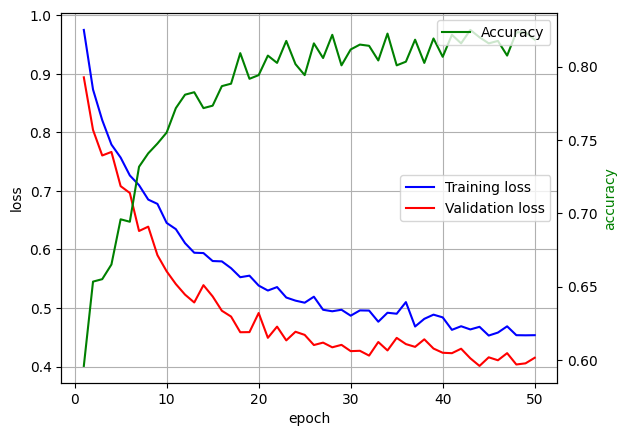

In [16]:
# Display the metrics evolution
fig1, ax1 = plt.subplots()
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.plot(epochs, train_losses, color='b', label='Training loss')
ax1.plot(epochs, validation_losses, color='r', label='Validation loss')
ax1.grid(True)
ax1.legend(loc='right')
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('accuracy', color='g')
ax2.plot(epochs, accuracies, color='g', label='Accuracy')
ax2.legend(loc='upper right')
#plt.show()
plt.savefig(os.path.join(output_directory, "epochLoss.png"))